# Exploratory Data Analysis on Car Price Dataset

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

## Reading Data

In [2]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car.shape

(205, 26)

In [4]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Cleaning
- drop car_ID
- replacing carName with CompanyName
- removing duplicate values in CompanyName

In [6]:
car=car.drop(['car_ID'],axis=1)

In [7]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
CompanyName = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3,"CompanyName",CompanyName)
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
car['CompanyName'] = car['CompanyName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [10]:
car.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
car.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [13]:
import warnings
warnings.filterwarnings('ignore')

# Visualizing the data

## Categorical Features

### Price distribution of cars

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

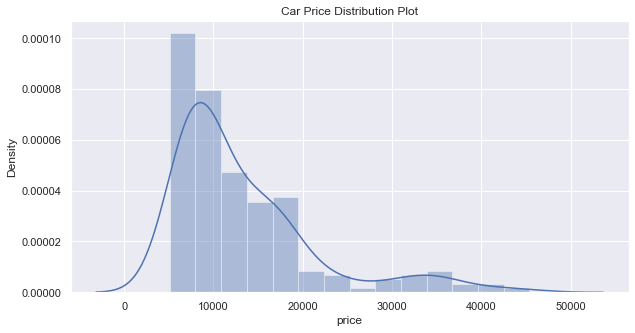

In [14]:
plt.figure(figsize=(10,5))
plt.title('Car Price Distribution Plot')
sns.distplot(car['price'])

Inference:
- Price distribution plot is right skewed
- maximum number of cars are in range of 20000

### Car Price Spread

<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='price'>

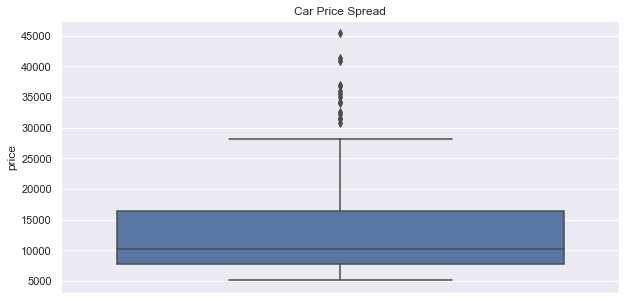

In [15]:
plt.figure(figsize=(10,5))
plt.title('Car Price Spread')
sns.boxplot(y=car.price)

In [16]:
print(car.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Inference:
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are     below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

### Companies v/s count

In [17]:
df=pd.DataFrame(car['CompanyName'].value_counts()).reset_index().rename(columns={'index':'car_name','CompanyName': 'count'})

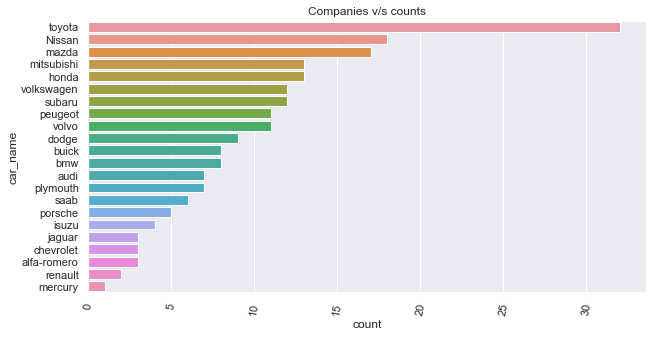

In [18]:
plt.figure(figsize=(10,5))
plt.title('Companies v/s counts')
plot = sns.barplot(y='car_name',x='count',data=df)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

Inference:
- Toyota is the most favored car
- mercury is the least favored car

### Fuel Type Ratio

In [19]:
df=pd.DataFrame(car['fueltype'].value_counts())

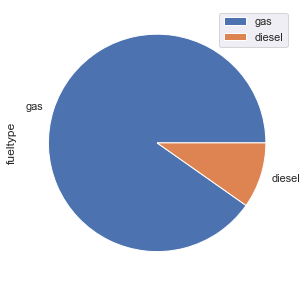

In [20]:
plot = df.plot.pie(y='fueltype', figsize=(5, 5))

Inference:
- Number of gas fueled cars are more than diesel

### Car Type

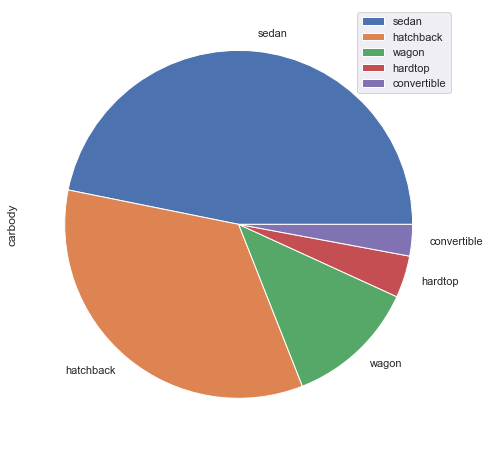

In [21]:
df=pd.DataFrame(car['carbody'].value_counts())
plot = df.plot.pie(y='carbody', figsize=(8, 8))

### Drive wheel

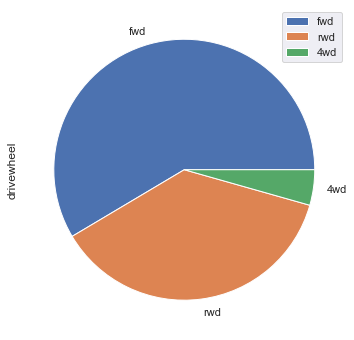

In [22]:
df=pd.DataFrame(car['drivewheel'].value_counts())
plot = df.plot.pie(y='drivewheel', figsize=(6, 6))

### Engine Location

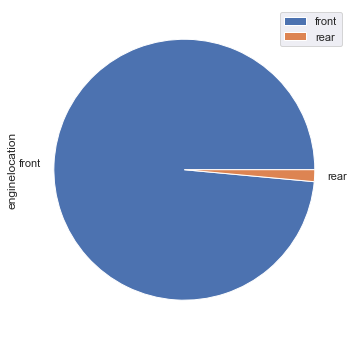

In [23]:
df=pd.DataFrame(car['enginelocation'].value_counts())
plot = df.plot.pie(y='enginelocation', figsize=(6, 6))

### Engine Type

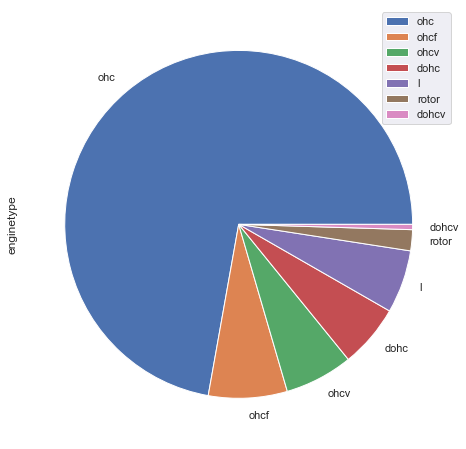

In [24]:
df=pd.DataFrame(car['enginetype'].value_counts())
plot = df.plot.pie(y='enginetype', figsize=(8,8))

### Aspiration Ratio

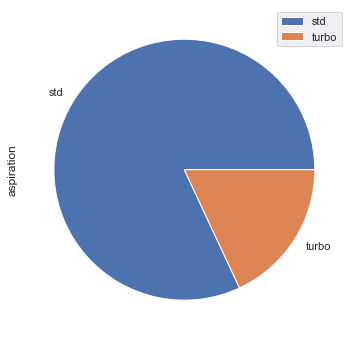

In [25]:
df=pd.DataFrame(car['aspiration'].value_counts())
plot = df.plot.pie(y='aspiration', figsize=(6,6))

### Symboling

In [26]:
df=pd.DataFrame(car['symboling'].value_counts()).reset_index().rename(columns={'index':'symboling','symboling':'count'})

<AxesSubplot:xlabel='symboling', ylabel='count'>

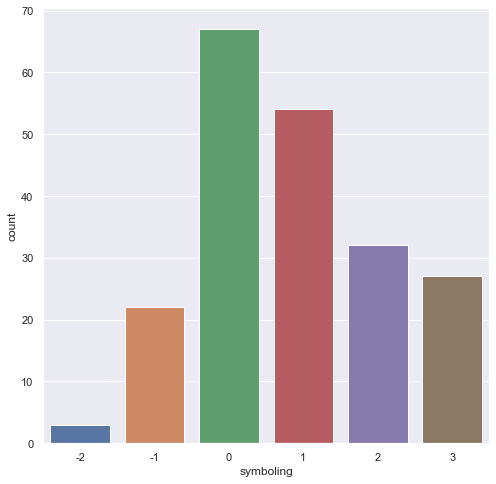

In [27]:
sns.barplot(x='symboling',y='count',data=df)

### Door number

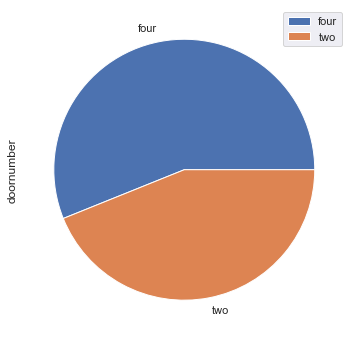

In [28]:
df=pd.DataFrame(car['doornumber'].value_counts())
plot = df.plot.pie(y='doornumber', figsize=(6,6))

### Cyclinder number

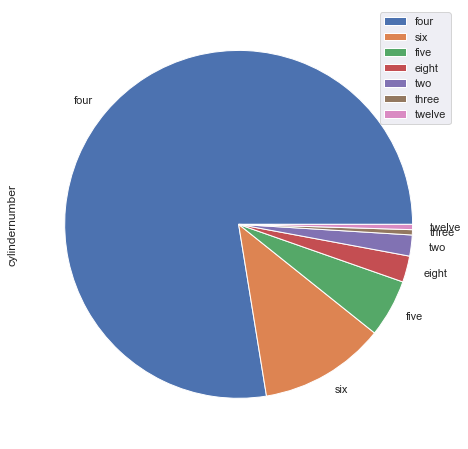

In [29]:
df=pd.DataFrame(car['cylindernumber'].value_counts())
plot = df.plot.pie(y='cylindernumber', figsize=(8,8))

### Fuel System

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

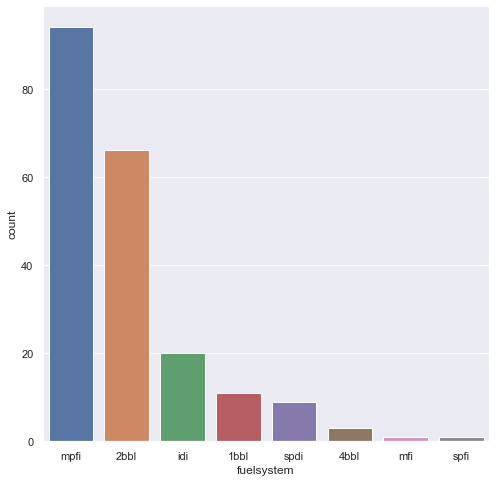

In [30]:
df=pd.DataFrame(car['fuelsystem'].value_counts()).reset_index().rename(columns={'index':'fuelsystem','fuelsystem':'count'})
sns.barplot(x='fuelsystem',y='count',data=df)

### Price distribution of diesel vs gas car

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

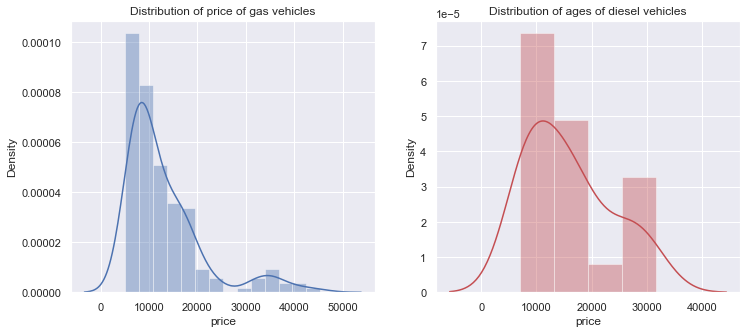

In [31]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(car[(car.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(car[(car.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

<AxesSubplot:xlabel='fueltype', ylabel='price'>

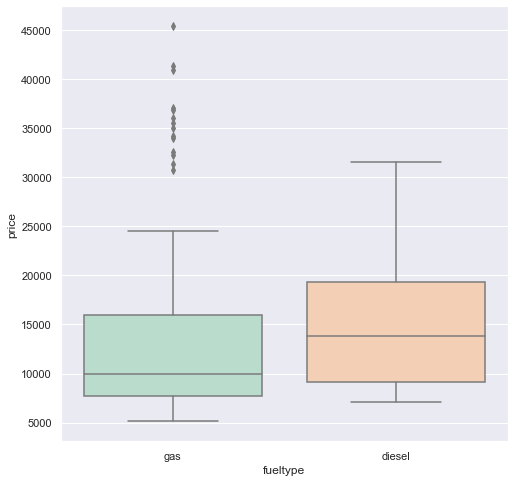

In [32]:
sns.boxplot(x = 'fueltype', y = 'price', data = car,palette='Pastel2')

### Price distribution of Std vs Turbo aspiration vehicles

Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

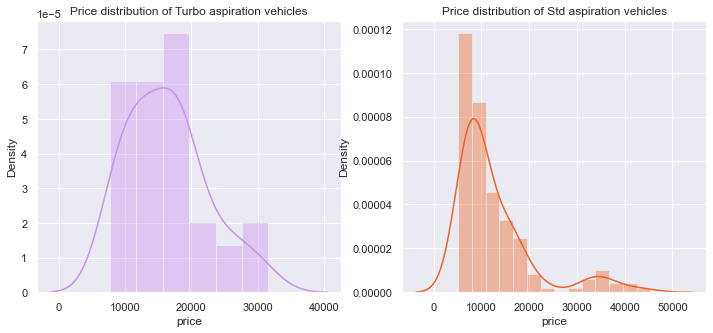

In [33]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(car[(car.aspiration== 'turbo')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax=f.add_subplot(122)
plot=sns.distplot(car[(car.aspiration == 'std')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')

<AxesSubplot:xlabel='aspiration', ylabel='price'>

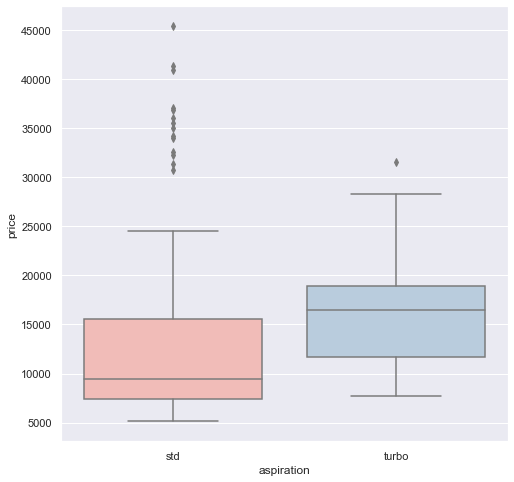

In [34]:
sns.boxplot(x = 'aspiration', y = 'price', data = car,palette='Pastel1')

### Price distribution according to symboling

<AxesSubplot:xlabel='symboling', ylabel='price'>

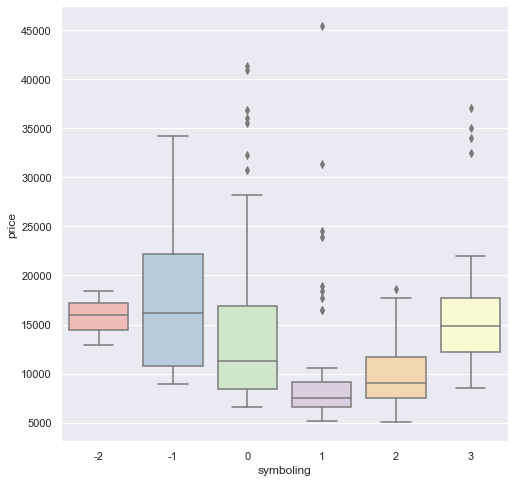

In [35]:
sns.boxplot(x = 'symboling', y = 'price', data = car,palette='Pastel1')

### Price distribution according to door number

Text(0.5, 1.0, 'Price distribution of cars having four doors')

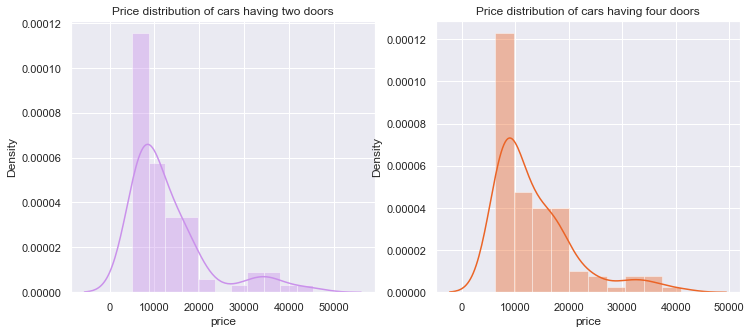

In [36]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(car[(car.doornumber== 'two')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of cars having two doors')

ax=f.add_subplot(122)
plot=sns.distplot(car[(car.doornumber == 'four')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of cars having four doors')

<AxesSubplot:xlabel='doornumber', ylabel='price'>

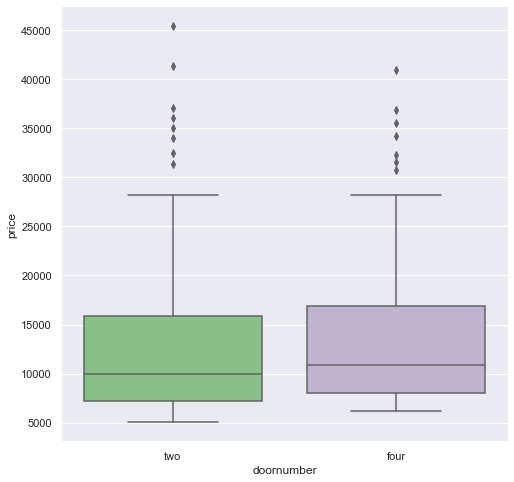

In [37]:
sns.boxplot(x = 'doornumber', y = 'price', data = car,palette='Accent')

### Price distribution according to car body

<AxesSubplot:xlabel='carbody', ylabel='price'>

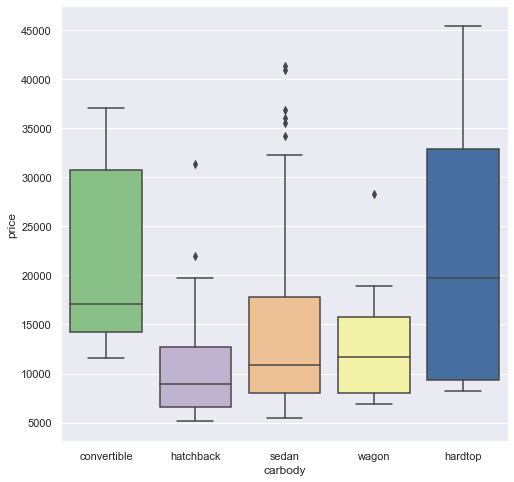

In [38]:
sns.boxplot(x = 'carbody', y = 'price', data = car,palette='Accent')

### Price distribution according to drive wheel

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

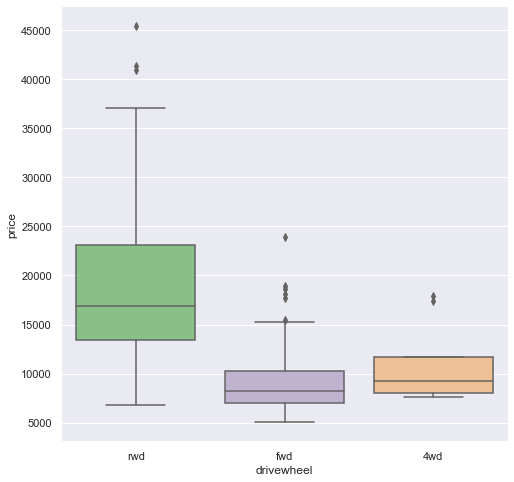

In [39]:
sns.boxplot(x = 'drivewheel', y = 'price', data = car,palette='Accent')

### Price distribution according to Engine type

<AxesSubplot:xlabel='enginetype', ylabel='price'>

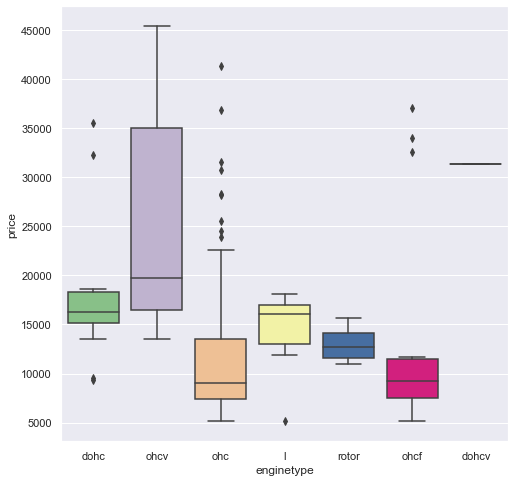

In [40]:
sns.boxplot(x = 'enginetype', y = 'price', data = car,palette='Accent')

### Price distribution according to the fuel system

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

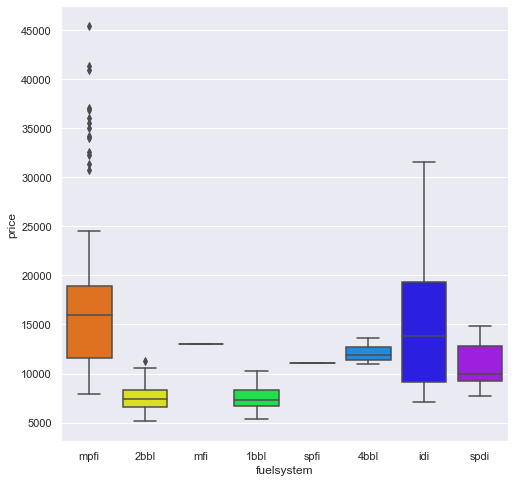

In [41]:
sns.boxplot(x = 'fuelsystem', y = 'price', data = car,palette='gist_rainbow')

# Visualising Numerical Features

### Wheelbase Vs Price

<AxesSubplot:xlabel='wheelbase', ylabel='price'>

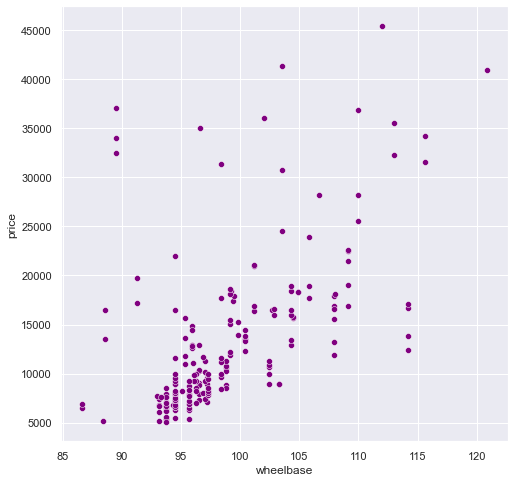

In [42]:
sns.scatterplot(x="wheelbase", y="price", data=car,color='purple')

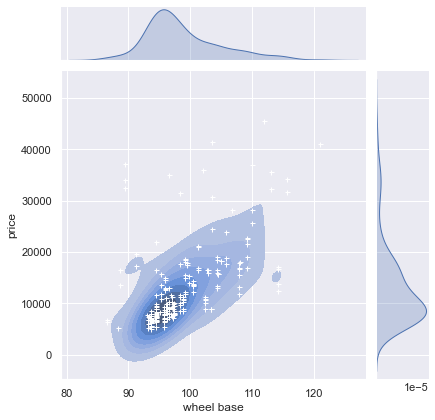

In [43]:
g = sns.jointplot(x="wheelbase", y="price", data=car, kind='kde', color="b",fill = True )
g.plot_joint(plt.scatter, c="w", s=25, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("wheel base", "price");


- Highly scattered points

### Carlength vs Car price

<AxesSubplot:xlabel='carlength', ylabel='price'>

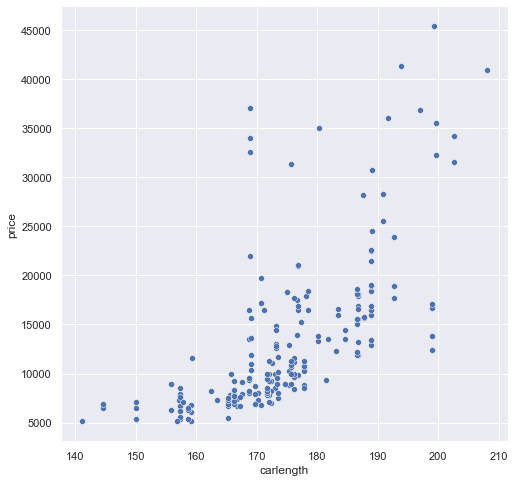

In [44]:
sns.scatterplot(x="carlength", y="price", data=car,color='b')

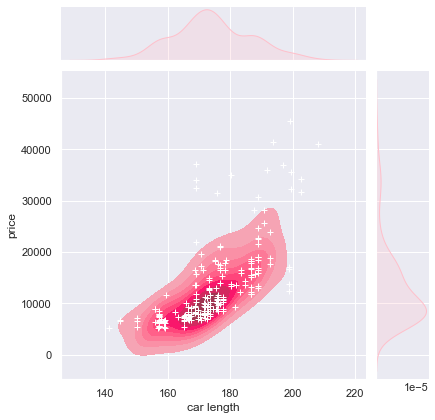

In [45]:
g = sns.jointplot(x="carlength", y="price", data=car, kind="kde", color="pink",fill = True )
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car length", "price");

- car length also scattered but less scattered than wheelbase

### Car width Vs Price

<AxesSubplot:xlabel='carwidth', ylabel='price'>

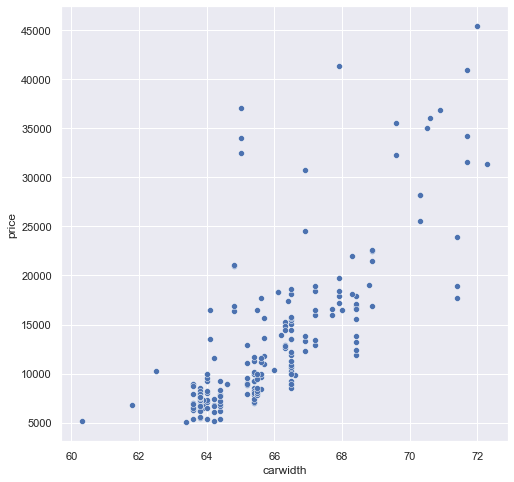

In [46]:
sns.scatterplot(x="carwidth", y="price", data=car,color='b')

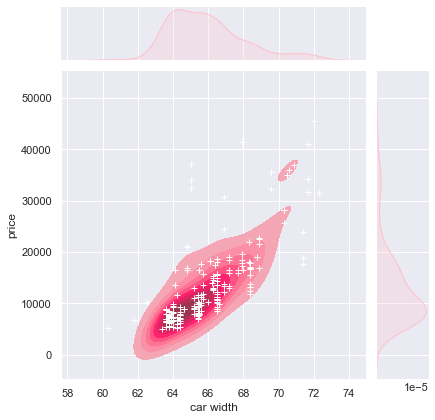

In [47]:
g = sns.jointplot(x="carwidth", y="price", data=car, kind="kde", color="pink",fill = True)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "price");

### Car length vs Car width

<AxesSubplot:xlabel='carlength', ylabel='carwidth'>

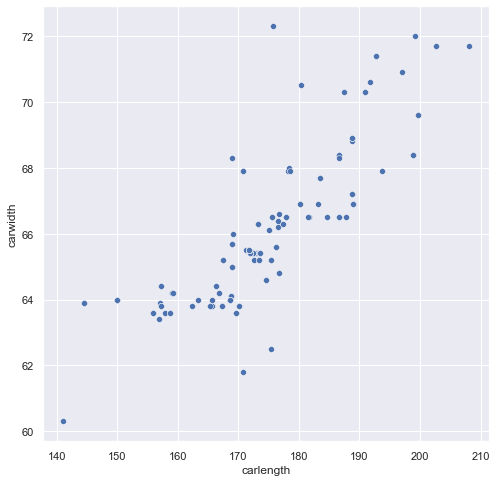

In [48]:
sns.scatterplot(x="carlength", y="carwidth", data=car,color='b')

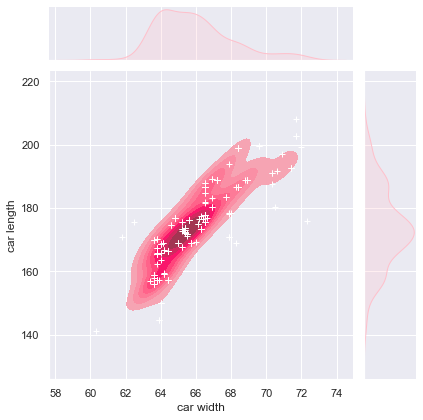

In [49]:
g = sns.jointplot(x="carwidth", y="carlength", data=car, kind="kde", color="pink",fill = True)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "car length");

- interesting !!! strong relation is seemed between car length and car width

### Curbweight vs Price

<AxesSubplot:xlabel='curbweight', ylabel='price'>

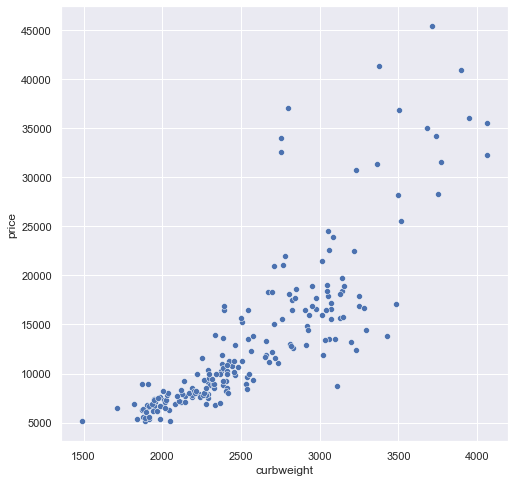

In [50]:
sns.scatterplot(x="curbweight", y="price", data=car,color='b')

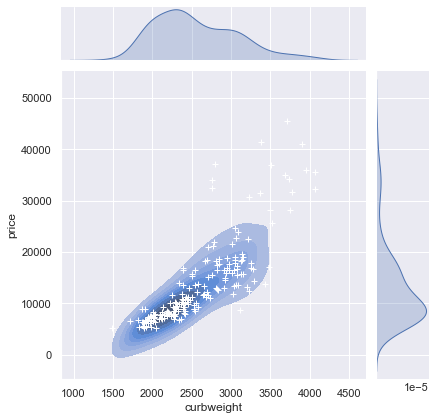

In [51]:
g = sns.jointplot(x="curbweight", y="price", data=car, kind="kde", color="b",fill = True)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curbweight", "price");

- points are scattered after curbweight of 2900, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after curbweight of 2900 .

### Engine size Vs Price

<AxesSubplot:xlabel='enginesize', ylabel='price'>

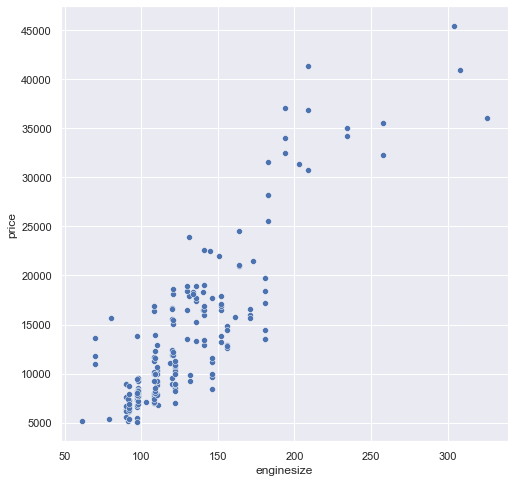

In [52]:
sns.scatterplot(x="enginesize", y="price", data=car,color='b')

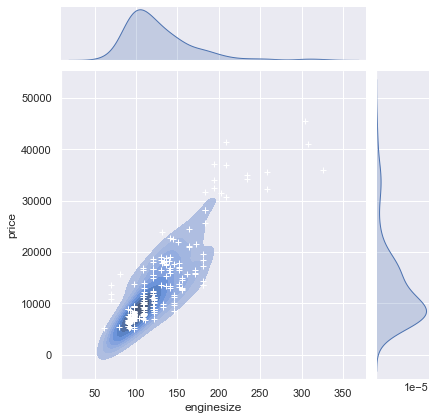

In [53]:
g = sns.jointplot(x="enginesize", y="price", data=car, kind="kde", color="b",fill = True)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("enginesize", "price");

- points are scattered after engine size of 140, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after engine size of 140 .

### Boreratio vs Price

<AxesSubplot:xlabel='boreratio', ylabel='price'>

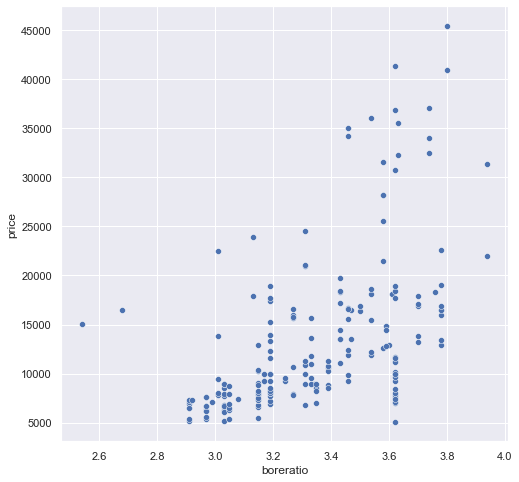

In [54]:
sns.scatterplot(x="boreratio", y="price", data=car,color='b')

### Stroke vs price

<AxesSubplot:xlabel='stroke', ylabel='price'>

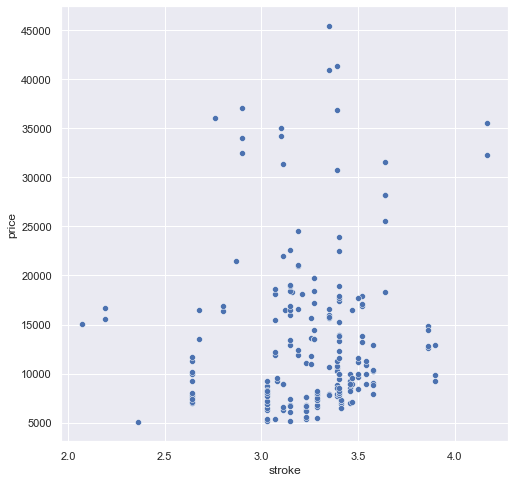

In [55]:
sns.scatterplot(x="stroke", y="price", data=car,color='b')

- very weak correlation between stroke vs price

### Compression ratio vs Price

<AxesSubplot:xlabel='compressionratio', ylabel='price'>

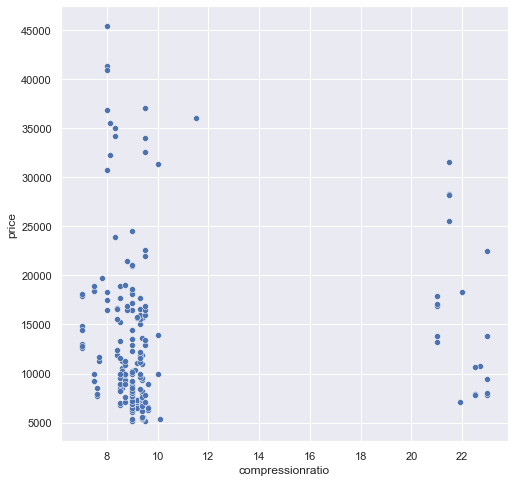

In [56]:
sns.scatterplot(x="compressionratio", y="price", data=car,color='b')

- no relation between compression ratio and price

### Horsepower vs Price

<AxesSubplot:xlabel='horsepower', ylabel='price'>

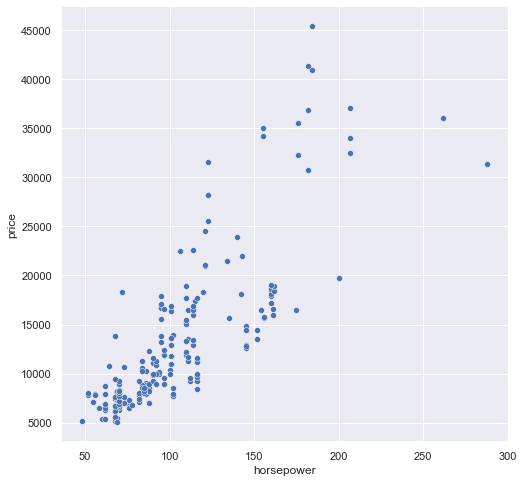

In [57]:
sns.scatterplot(x="horsepower", y="price", data=car,color='b')

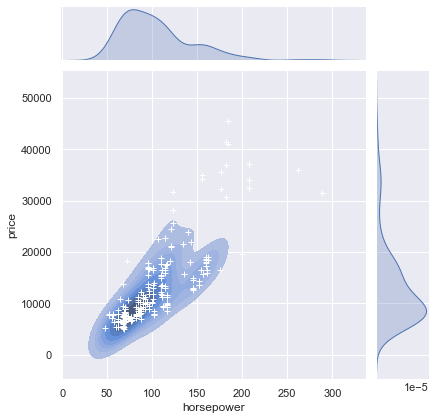

In [58]:
g = sns.jointplot(x="horsepower", y="price", data=car, kind="kde", color="b",fill = True)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("horsepower", "price");

### Peakrpm vs price

<AxesSubplot:xlabel='peakrpm', ylabel='price'>

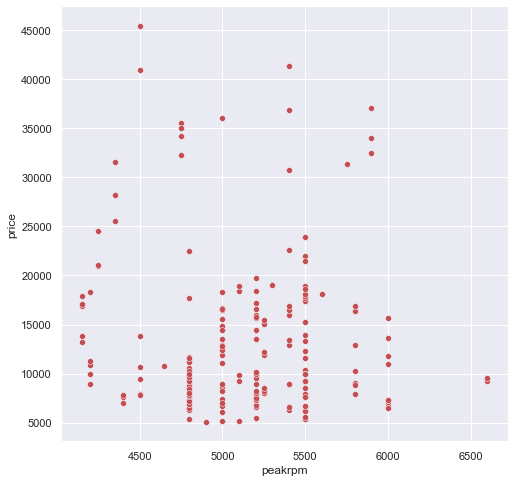

In [59]:
sns.scatterplot(x="peakrpm", y="price", data=car,color='r')

- no correlation between peakrpm and price

### Citympg vs Price

<AxesSubplot:xlabel='citympg', ylabel='price'>

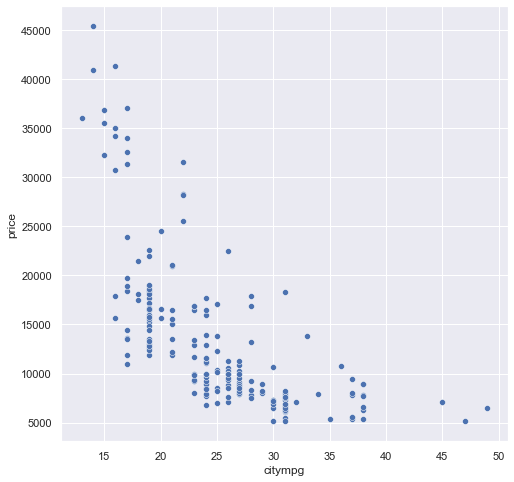

In [60]:
sns.scatterplot(x="citympg", y="price", data=car,color='b')

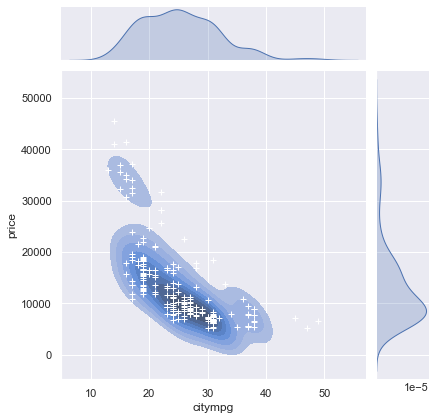

In [61]:
g = sns.jointplot(x="citympg", y="price", data=car, kind="kde", color="b",fill = True)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("citympg", "price");

- negative correlation is seen between citympg and price

### Highwaympg vs Price

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

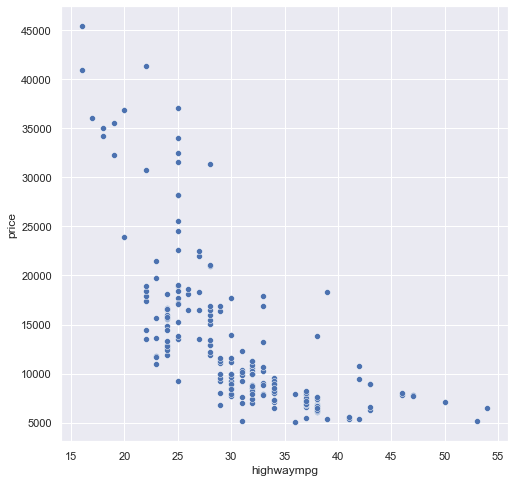

In [62]:
sns.scatterplot(x="highwaympg", y="price", data=car,color='b')

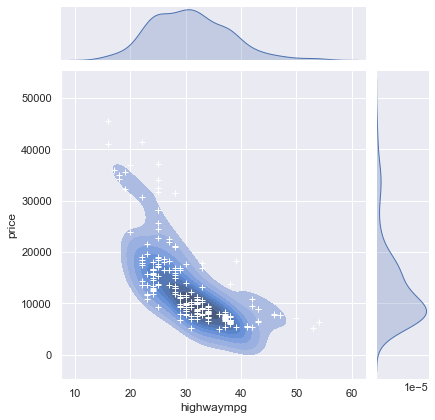

In [63]:
g = sns.jointplot(x="highwaympg", y="price", data=car, kind="kde", color="b",fill = True)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("highwaympg", "price");

- negative correlation between highwaympg and price

### Pairplot of all numerical features

In [64]:
numerical_cols=car.select_dtypes(exclude=['object']).columns

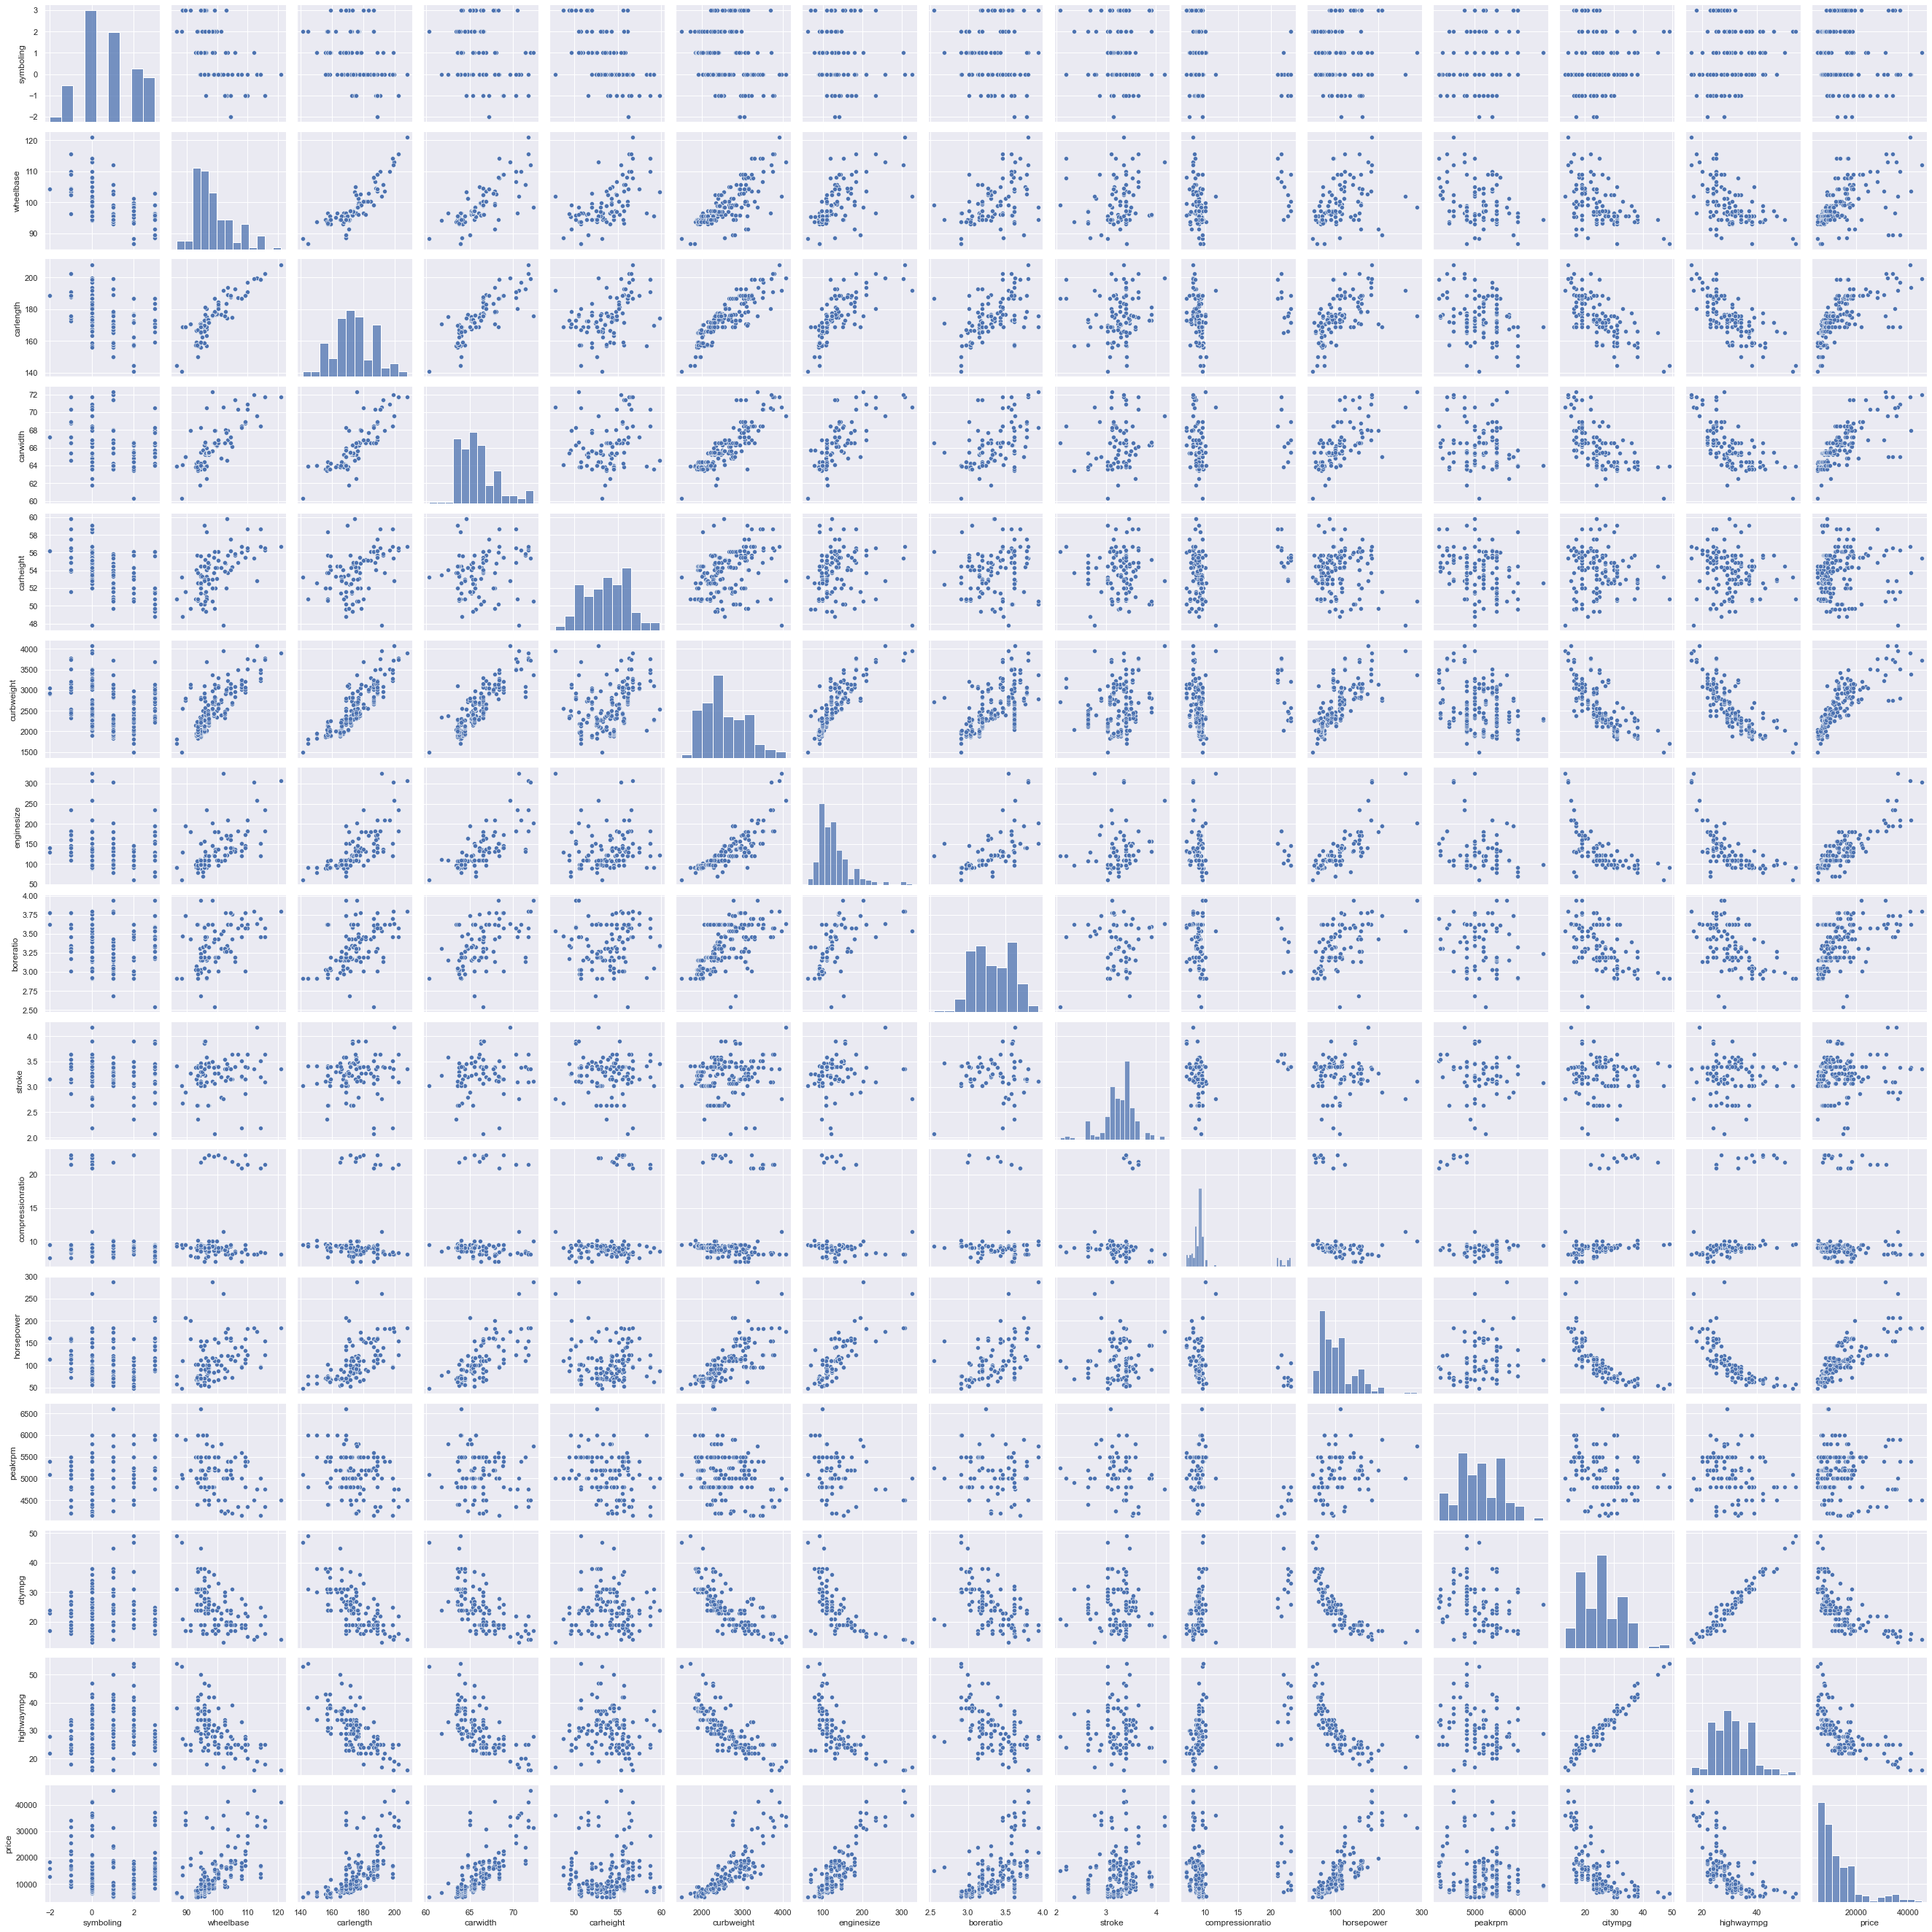

In [65]:
ax = sns.pairplot(car[numerical_cols])

### Correlation matrix

In [66]:
car[numerical_cols].corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<AxesSubplot:>

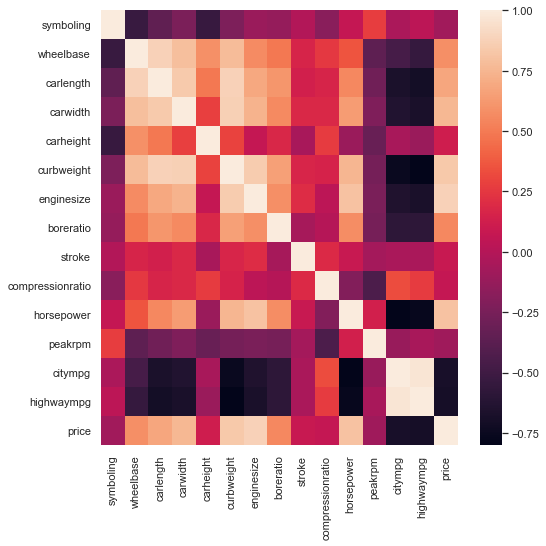

In [67]:
sns.heatmap(car[numerical_cols].corr())

- wheelbase has high positive correlation with carlength,carwidth and curbweight
- carlength has high postive correlation with curbweight
- carlength has negative correlation with highwaympg
- carwidth has high postive correlation with curbweight and engine size
- enginesize has high positive correlation with horsepower
- curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
- horsepower has negative correlation with citympg and highwaympg
- citympg and highwaympg are highly correlated

### Scatter plot of wheelbase , carlength,carheight and carweight with price

In [68]:
col=['wheelbase','carlength','carwidth','curbweight','price']

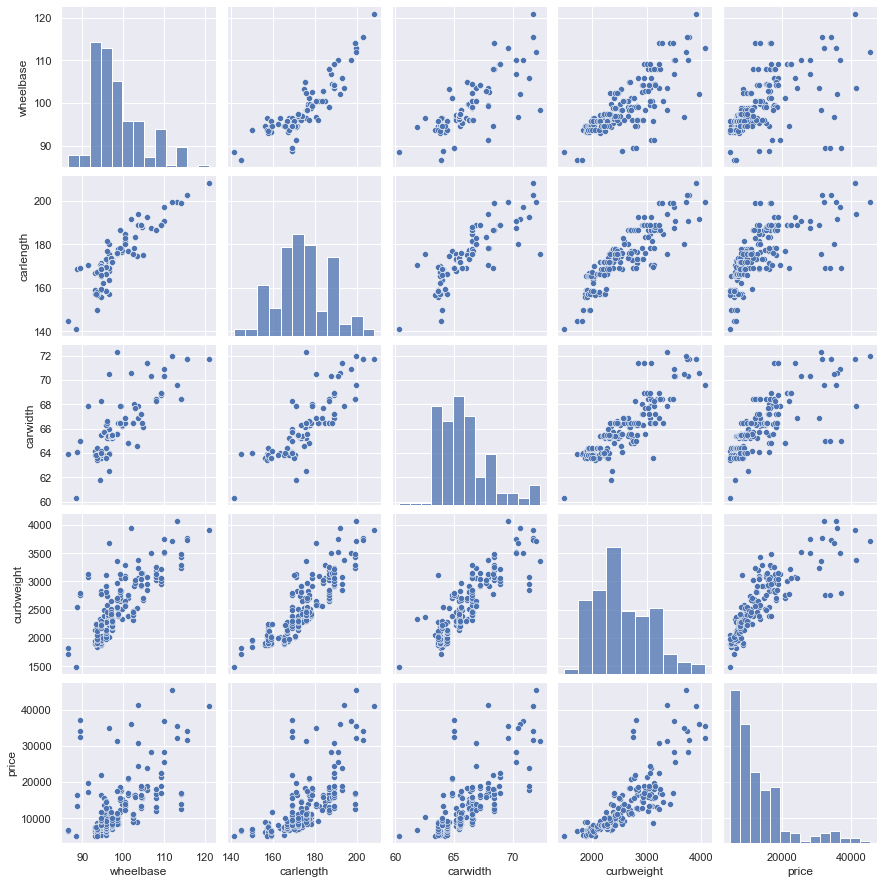

In [69]:
sns.pairplot(car[col])

<AxesSubplot:>

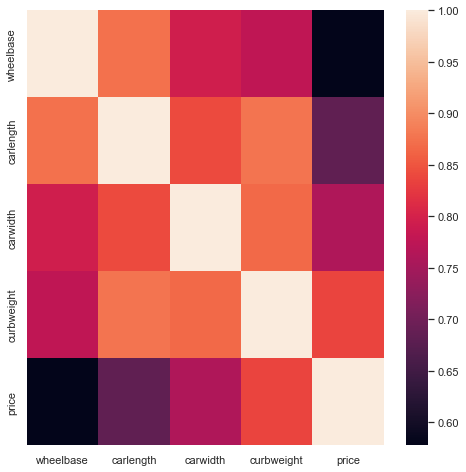

In [70]:
sns.heatmap(car[col].corr())

### Scatter plot of carlength,curbweight,highwaympg with price

In [71]:
col=['carlength','highwaympg','curbweight','price']

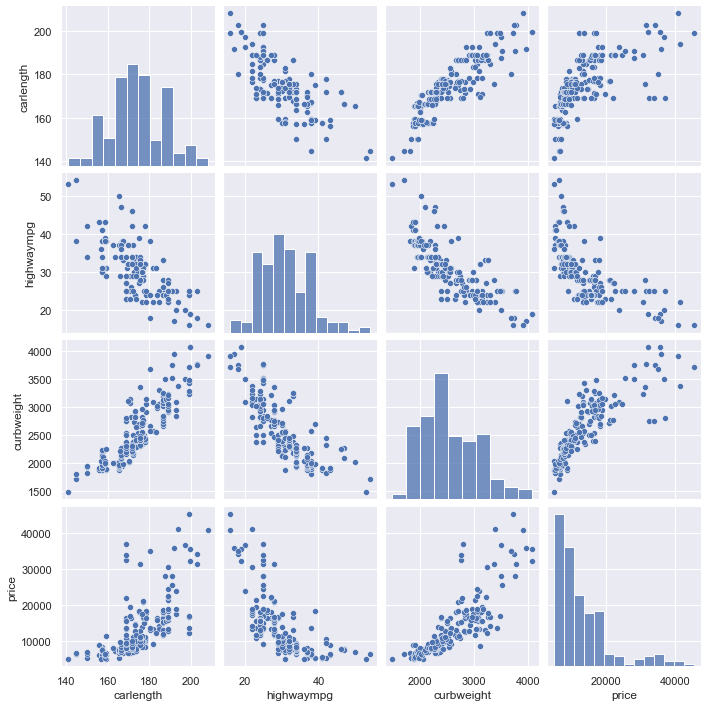

In [73]:
sns.pairplot(car[col])

<AxesSubplot:>

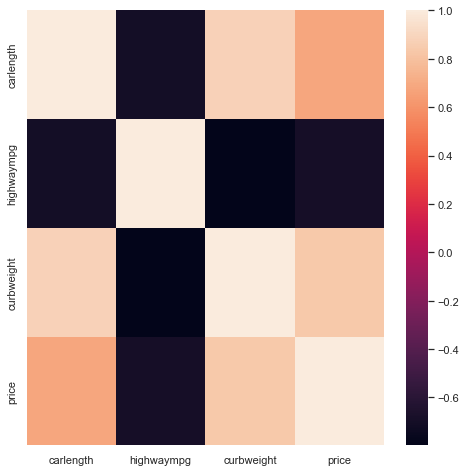

In [74]:
sns.heatmap(car[col].corr())

### Scatter plot of carwidth,curbweight ,engine size and price

In [75]:
col=['carwidth','curbweight','enginesize','price']

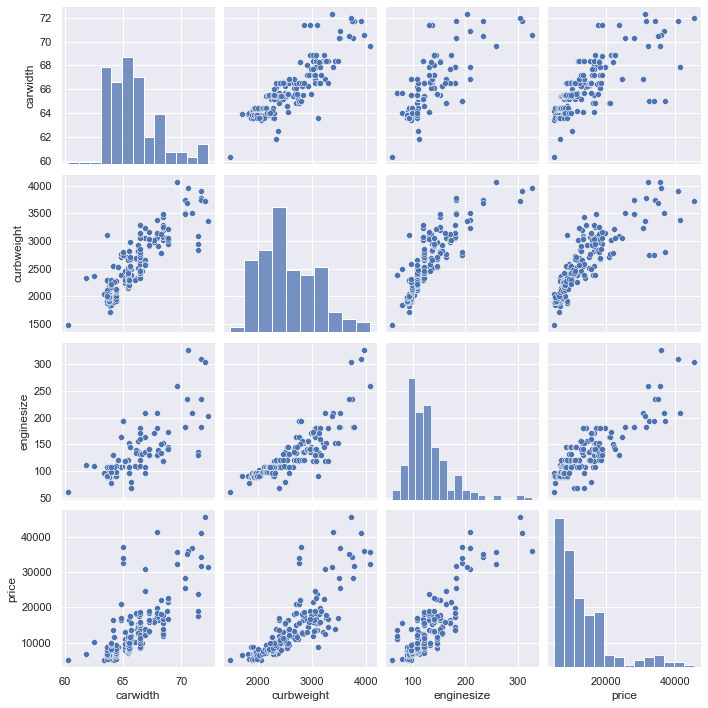

In [76]:
sns.pairplot(car[col])

<AxesSubplot:>

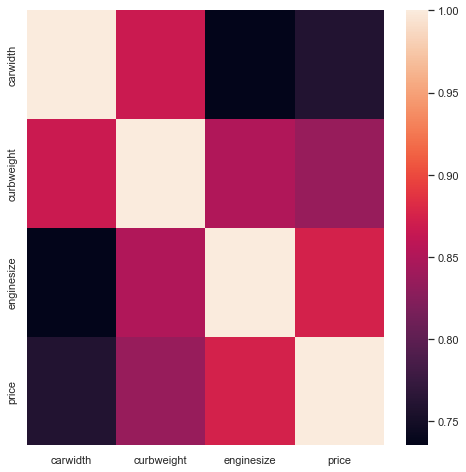

In [77]:
sns.heatmap(car[col].corr())

### Scatter plot of curbweight ,engine size ,horse power,highwaympg and price

In [78]:
col=['curbweight','enginesize','horsepower','highwaympg','price']

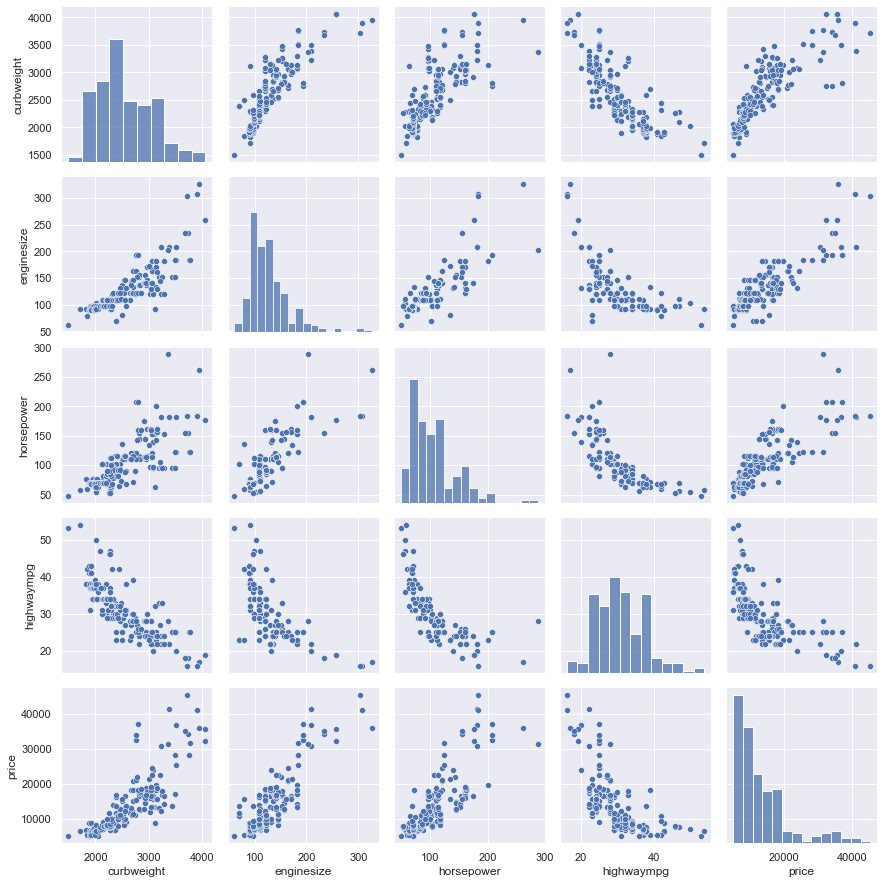

In [79]:
sns.pairplot(car[col])

<AxesSubplot:>

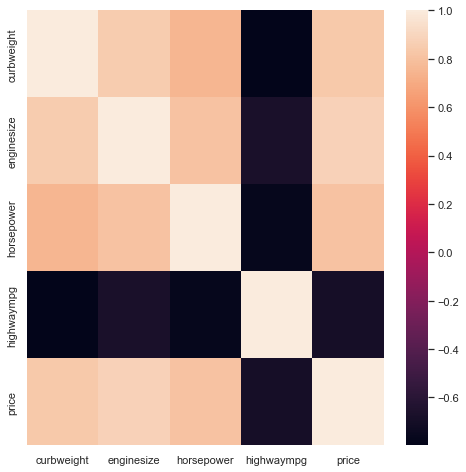

In [80]:
sns.heatmap(car[col].corr())

### Horsepower,citympg , highway mpg and price

In [81]:
col=['horsepower','citympg','highwaympg','price']

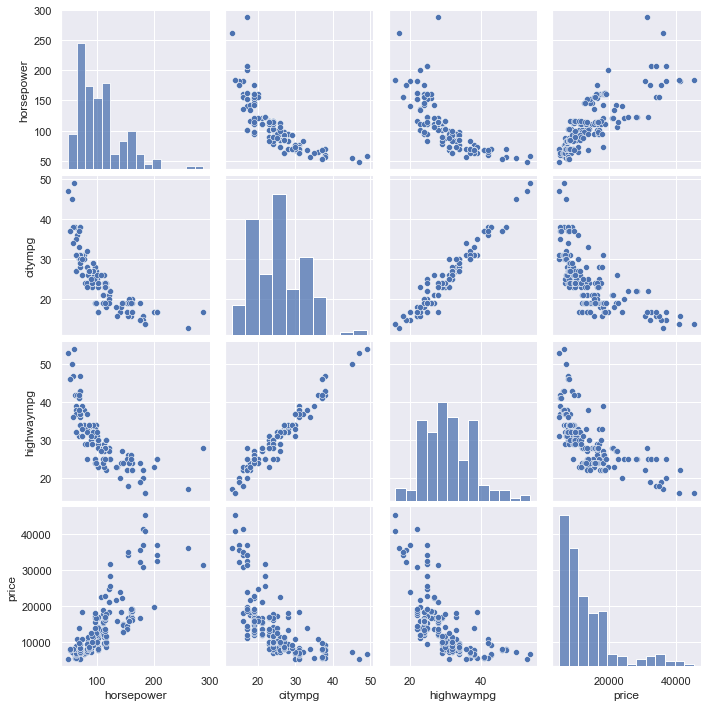

In [82]:
sns.pairplot(car[col])

<AxesSubplot:>

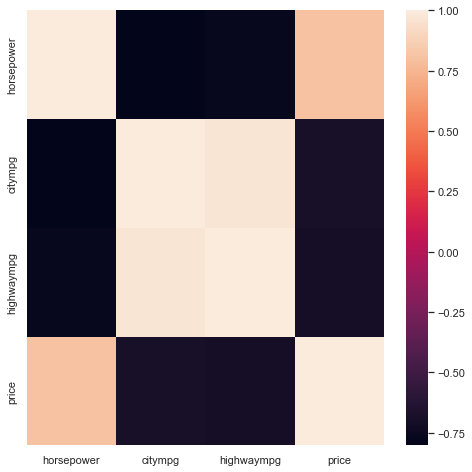

In [83]:
sns.heatmap(car[col].corr())

### Horsepower Vs Car Body categorized by carbody

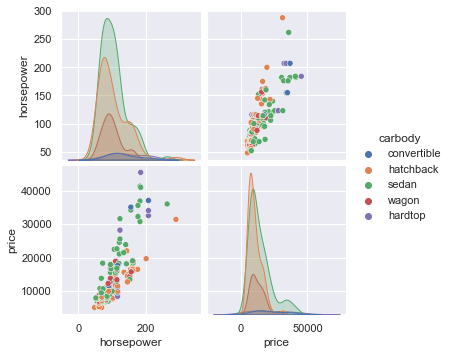

In [84]:
sns.pairplot(car[['horsepower','price','carbody']], hue="carbody");

### Fitting all features with price

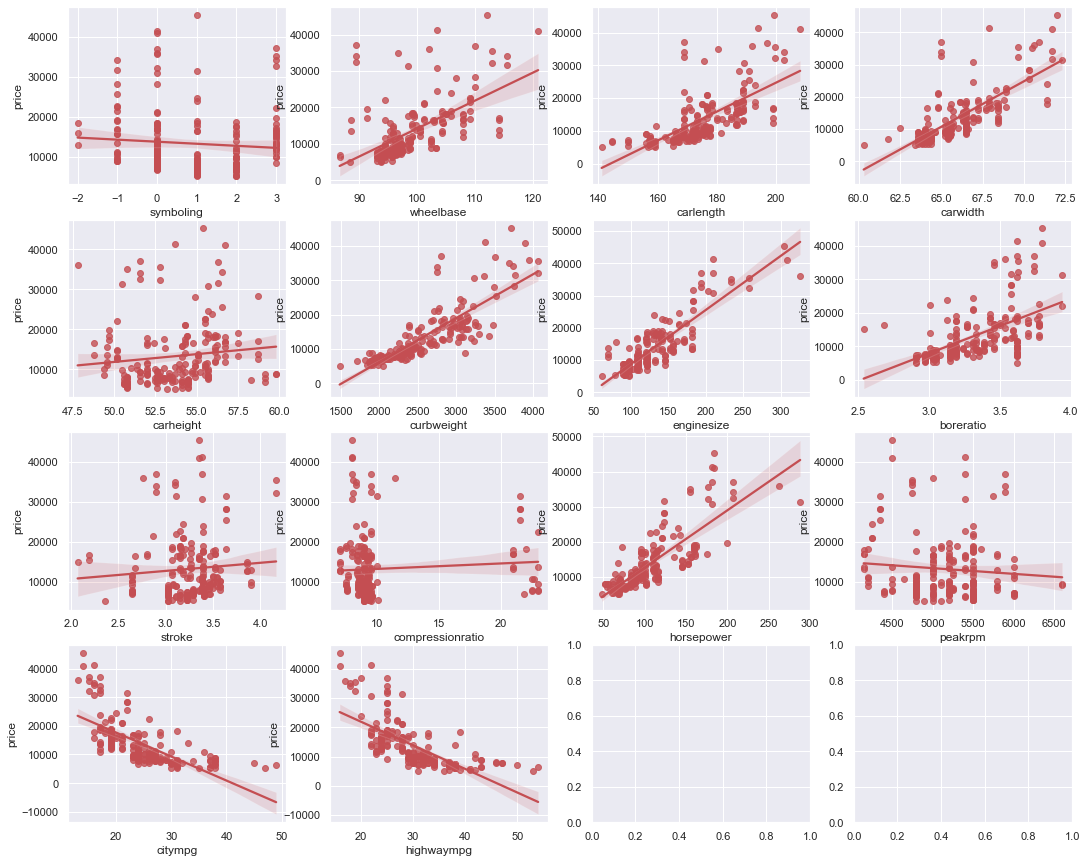

In [85]:
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=car,ax=axes[x][y],color='r')